<a href="https://colab.research.google.com/github/sxudan/artificial-intelligence-journey/blob/main/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolution Neural Network

## Regular Neural Net

Neural Networks receive an input (a single vector), and transform it through a series of hidden layers. Each hidden layer is made up of a set of neurons, where each neuron is fully connected to all neurons in the previous layer, and where neurons in a single layer function completely independently and do not share any connections. The last fully-connected layer is called the “output layer” and in classification settings it represents the class scores.

### Disadavantage of Regular Net with images

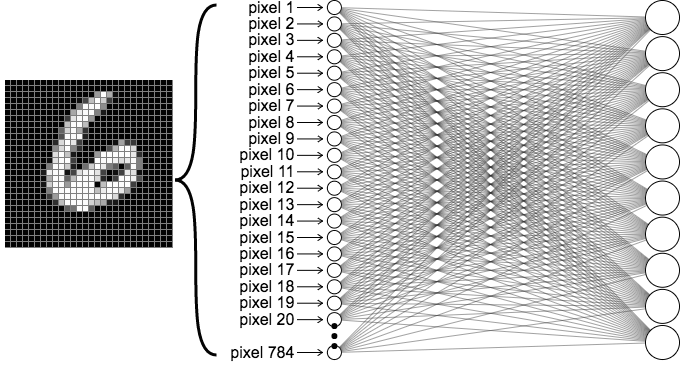

Regular neural net doesn't work well with full images. let's take an example:  let an image be of shape (32,32,3). This means it has width 32, height 32 and 3 color channels (Red, Green and Blue).

So, Flattening this matrix into a single input vector for single neuron would result in an array of 32 * 32 * 3 = 3072 nodes and associated weights. Again For example, an image of more respectable size, e.g. 200x200x3, would lead to neurons that have 200*200*3 = 120,000 weights. Moreover, we would almost certainly want to have several such neurons, so the parameters would add up quickly! Clearly, this full connectivity is wasteful and the huge number of parameters would quickly lead to overfitting.

Convolutional Neural Networks (CNNs) have emerged as a solution to this problem. You'll find this subclass of deep neural networks powering almost every computer vision application out there! High-resolution photography is accessible to almost anyone with a smartphone these days.

## Convolution Neural Network

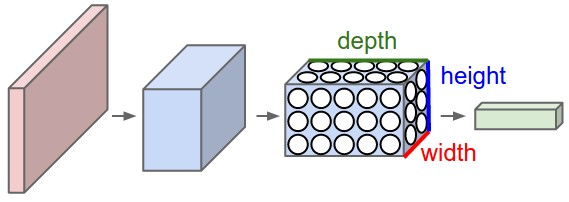


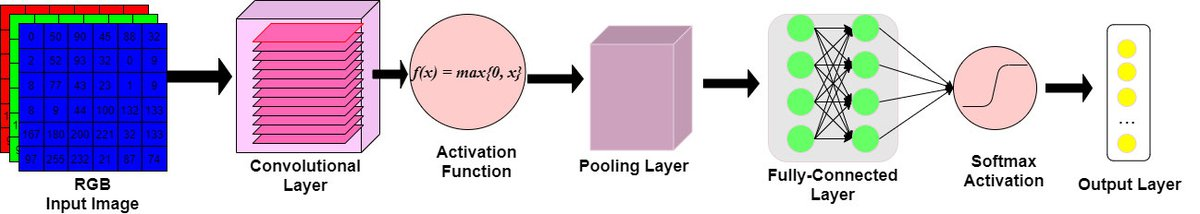

The ConvNet takes advantages of the input being 3D input (width, height, depth). A ConvNet arranges its neurons in three dimensions (width, height, depth). Every layer of a ConvNet transforms the 3D input volume to a 3D output volume of neuron activations

## Architecture

Reference: 

https://cs231n.github.io/convolutional-networks/

https://www.learndatasci.com/tutorials/convolutional-neural-networks-image-classification/


CNN architectures are made up of some distinct layers. In all cases, the layers take as input a 3D volume, transform this volume through differential equations, and output a 3D volume. Some layers require the tweaking of hyperparameters, and some do not.

0. Input Layer:

the raw pixel values of an image represented as a 3D matrix
Dimensions W x H x D, where depth corresponds to the number of color channels in the image.


1. Convolutional Layer:

Conv. Layers will compute the output of nodes that are connected to local regions of the input matrix.
Dot products are calculated between a set of weights (commonly called a filter) and the values associated with a local region of the input.

This may result in volume such as [32x32x12] if we decided to use 12 filters.

In a convolutional neural network (CNN), the filters (also known as kernels) can be thought of as the equivalent of weights in a fully connected artificial neural network (ANN).

https://www.songho.ca/dsp/convolution/convolution2d_example.html



2. ReLu (Activation) Layer:

The output volume of the Conv. layer is fed to an elementwise activation function, commonly a Rectified-Linear Unit (ReLu).
The ReLu layer will determine whether an input node will 'fire' given the input data.
This 'firing' signals whether the convolution layer's filters have detected a visual feature.
A ReLu function will apply a f(x) = max(0, x) function, thresholding at 0. which means it replaces negative values with zero and leaves positive values unchanged.

The dimensions of the volume are left unchanged.


3. Pooling Layer:

A down-sampling strategy is applied to reduce the width and height of the output volume.

Example:  [32x32x12] will become [16x16x12].

4. Fully-Connected Layer:

The output volume, i.e. 'convolved features,' are passed to a Fully-Connected Layer of nodes.
Like conventional neural-networks, every node in this layer is connected to every node in the volume of features being fed-forward.
The class probabilities are computed and are outputted in a 3D array with dimensions: [1, 1, K], where K is the number of classes.

# Image Classification

## Convolution Classfier


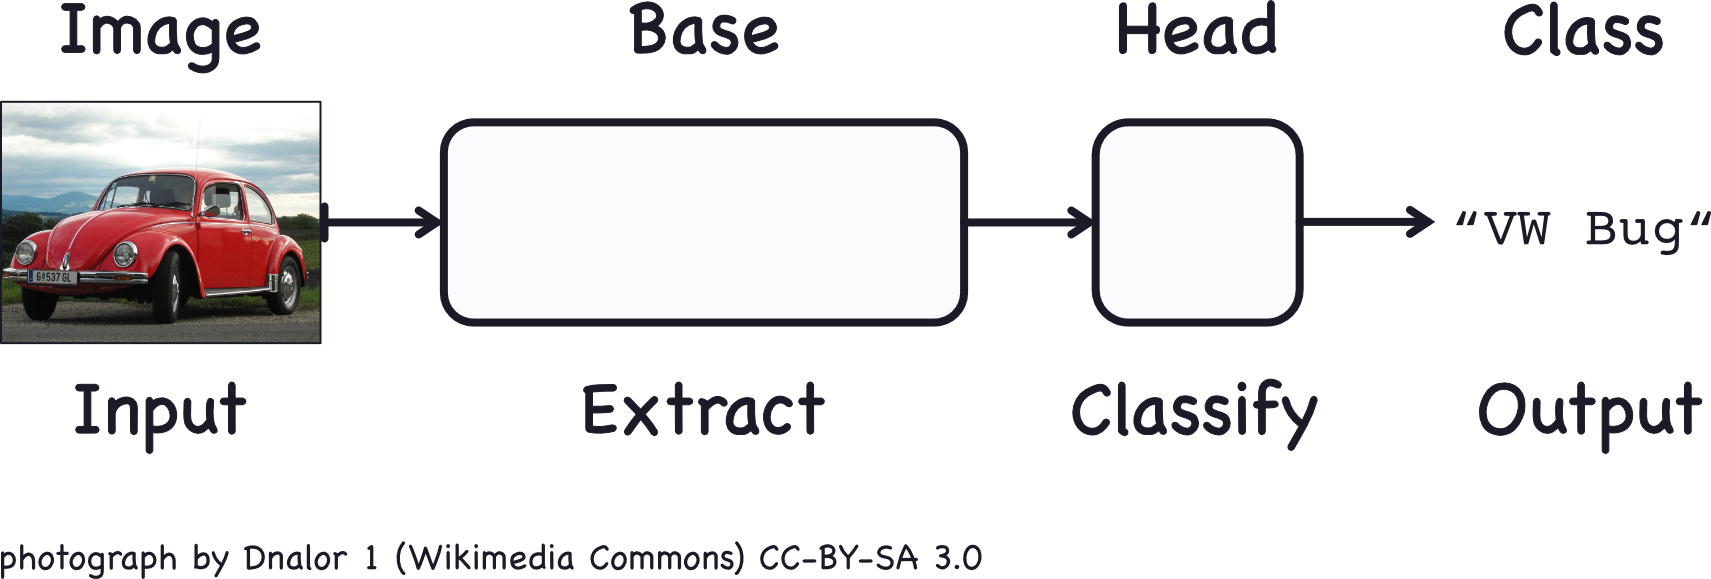

The base is used to extract the features from an image. It is formed primarily of layers performing the convolution operation, but often includes other kinds of layers as well. (You'll learn about these in the next lesson.)

The head is used to determine the class of the image. It is formed primarily of dense layers, but might include other layers like dropout.

The goal of the network during training is to learn two things:

which features to extract from an image (base),
which class goes with what features (head).
These days, convnets are rarely trained from scratch. More often, we reuse the base of a pretrained model. To the pretrained base we then attach an untrained head. In other words, we reuse the part of a network that has already learned to do 1. Extract features, and attach to it some fresh layers to learn 2. Classify.

Because the head usually consists of only a few dense layers, very accurate classifiers can be created from relatively little data.

Reusing a pretrained model is a technique known as transfer learning. It is so effective, that almost every image classifier these days will make use of it.

In [68]:
import tensorflow_datasets as tfds
import tensorflow as tf

(train_data, test_data), info = tfds.load(name='cats_vs_dogs', split=["train[:10]", "train[10:20]"], with_info=True,
    as_supervised=True, batch_size=None)

In [69]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, 

In [70]:
# Function to resize images
image_size = (224, 224)
def resize_image(image, label):
    image = tf.image.resize(image, image_size)
    return image, label

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

In [71]:
train_ds = train_data.map(resize_image).map(convert_to_float).shuffle(1000).batch(1)

test_ds = test_data.map(resize_image).map(convert_to_float).shuffle(1000).batch(1)

In [72]:
print(test_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
import matplotlib.pyplot as plt
# Visualize some samples from the dataset
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(image)
    plt.title("Label: {}".format(label))
    plt.axis("off")
plt.show()


In [73]:
import tensorflow as tf
# Load the VGG16 model pre-trained on ImageNet data
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers to prevent training
base_model.trainable = False

# Summary of the base model
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 6)                 150534    
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 14865229 (56.71 MB)
Trainable params: 150541 (588.05 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [76]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [77]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
)

Epoch 1/10
10/10 [==============================] - 17s 2s/step - loss: 5.3336 - binary_accuracy: 0.6000 - val_loss: 3.5749 - val_binary_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 0.2773 - binary_accuracy: 0.8000 - val_loss: 6.1592 - val_binary_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 16s 2s/step - loss: 0.2773 - binary_accuracy: 0.8000 - val_loss: 7.1913 - val_binary_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 0.2083 - binary_accuracy: 0.9000 - val_loss: 13.9620 - val_binary_accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.2079 - binary_accuracy: 0.9000 - val_loss: 17.8704 - val_binary_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 16s 2s/step - loss: 0.2078 - binary_accuracy: 0.9000 - val_loss: 19.3726 - val_binary_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0

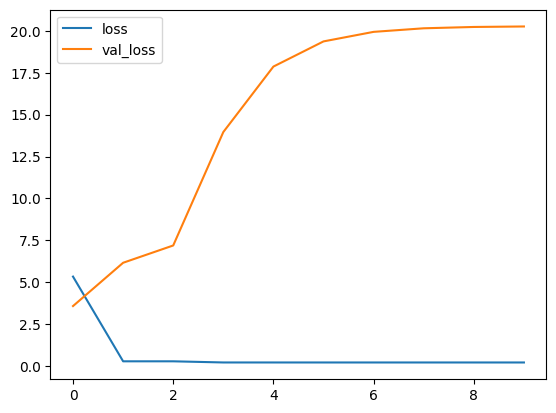

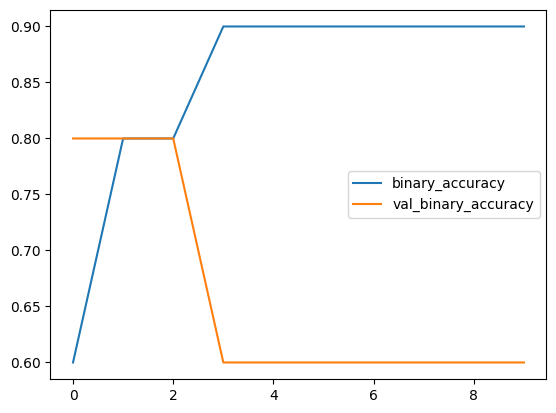

In [78]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();